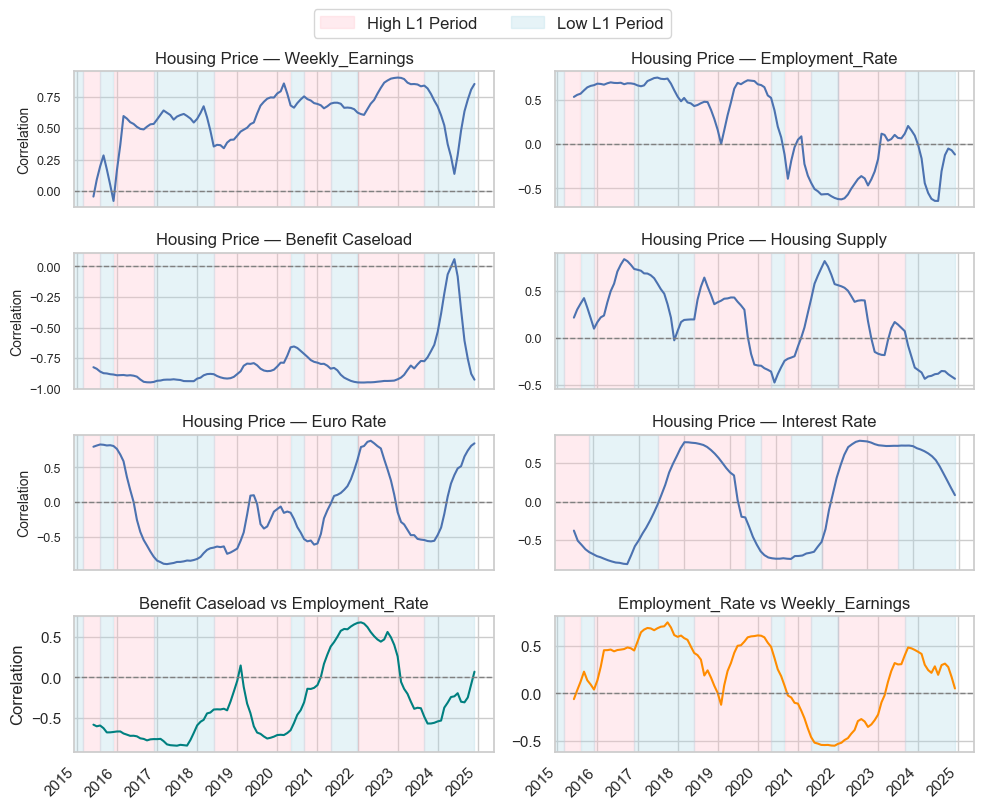

In [3]:
#Figure 4.5 Rolling correlation between policy variables and house prices（Northwest，2015–2024）


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.patches import Patch


df = pd.read_csv("North_West_Housing_Policy_Dataset_sd.csv", parse_dates=["Date"])
df = df.sort_values("Date").reset_index(drop=True)

target_col = "Average_Housing_Price"
policy_vars = [col for col in df.columns if col not in ['Date', target_col]]

sns.set(style="whitegrid")

# high/low norm periods（North West）
high_periods_filtered = [
    ("2013-02-01", "2013-02-28"),
    ("2013-04-01", "2013-07-31"),
    ("2013-10-01", "2014-02-28"),
    ("2015-03-01", "2015-07-31"),
    ("2015-12-01", "2016-11-30"),
    ("2018-06-01", "2020-04-30"),
    ("2020-09-01", "2021-04-30"),
    ("2022-01-01", "2023-08-31")
]
low_periods_filtered = [
    ("2011-07-01", "2013-01-31"),
    ("2013-03-01", "2013-03-31"),
    ("2013-08-01", "2013-09-30"),
    ("2014-03-01", "2015-02-28"),
    ("2015-08-01", "2015-11-30"),
    ("2016-12-01", "2018-05-31"),
    ("2020-05-01", "2020-08-31"),
    ("2021-05-01", "2021-12-31"),
    ("2023-09-01", "2024-11-30")
]

# === 4*2Subplots ===
fig, axes = plt.subplots(4, 2, figsize=(10, 8))
axes = axes.flatten()


legend_elements = [
    Patch(facecolor='pink', edgecolor='pink', alpha=0.3, label='High L1 Period'),
    Patch(facecolor='lightblue', edgecolor='lightblue', alpha=0.3, label='Low L1 Period')
]

# === 1-6：Policies v.s. Housing price ===
for i, var in enumerate(policy_vars[:6]):
    ax = axes[i]
    window = 30 if var == "Interest Rate" else 24

    corrs = df[[target_col, var]].rolling(window=window).corr().unstack().iloc[:, 1]
    rolling_corr_df = pd.DataFrame({
        "Date": df["Date"],
        "Correlation": corrs
    })
    rolling_corr_df = rolling_corr_df[rolling_corr_df["Date"] >= "2015-06-01"]

    ax.plot(rolling_corr_df["Date"], rolling_corr_df["Correlation"],
            label=f"{var} (Window={window})", linewidth=1.5)
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)

    for start, end in high_periods_filtered:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='pink', alpha=0.3)
    for start, end in low_periods_filtered:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='lightblue', alpha=0.3)

    ax.set_title(f"Housing Price — {var}", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    if i % 2 != 0:
        ax.set_ylabel('')
    if i < 6:
        ax.set_xlabel('')
        ax.tick_params(labelbottom=False)
    if i % 2 == 0:
        ax.set_ylabel("Correlation", fontsize=10)

# 7：Benefit Caseload vs Employment Rate
pair_1 = ("Benefit Caseload", "Employment_Rate")
window_1 = 24
corrs_1 = df[list(pair_1)].rolling(window=window_1).corr().unstack().iloc[:, 1]
rolling_corr_df1 = pd.DataFrame({"Date": df["Date"], "Correlation": corrs_1})
rolling_corr_df1 = rolling_corr_df1[rolling_corr_df1["Date"] >= "2015-06-01"]

ax = axes[6]
ax.plot(rolling_corr_df1["Date"], rolling_corr_df1["Correlation"],
        label=f"{pair_1[0]} vs {pair_1[1]} (Window={window_1})", color='teal')
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
for start, end in high_periods_filtered:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='pink', alpha=0.3)
for start, end in low_periods_filtered:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='lightblue', alpha=0.3)
ax.set_title(f"{pair_1[0]} vs {pair_1[1]}")
ax.set_ylabel("Correlation")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

#  8：Employment Rate vs Weekly Earnings
pair_2 = ("Employment_Rate", "Weekly_Earnings")
window_2 = 24
corrs_2 = df[list(pair_2)].rolling(window=window_2).corr().unstack().iloc[:, 1]
rolling_corr_df2 = pd.DataFrame({"Date": df["Date"], "Correlation": corrs_2})
rolling_corr_df2 = rolling_corr_df2[rolling_corr_df2["Date"] >= "2015-06-01"]

ax = axes[7]
ax.plot(rolling_corr_df2["Date"], rolling_corr_df2["Correlation"],
        label=f"{pair_2[0]} vs {pair_2[1]} (Window={window_2})", color='darkorange')
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
for start, end in high_periods_filtered:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='pink', alpha=0.3)
for start, end in low_periods_filtered:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='lightblue', alpha=0.3)
ax.set_title(f"{pair_2[0]} vs {pair_2[1]}")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()



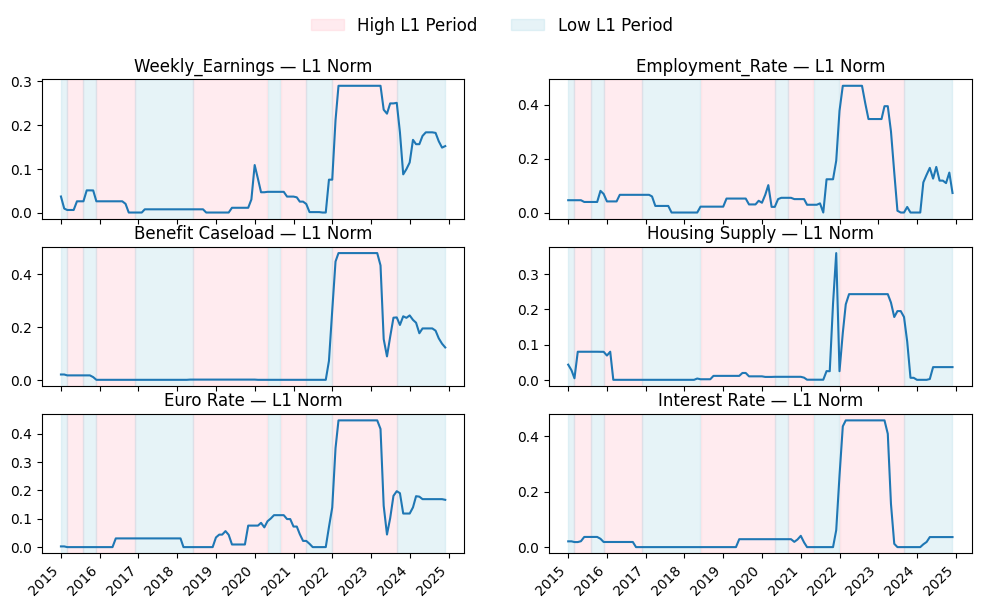

In [1]:
# Figure 4.7 The L₁ norm of the joint embedding point cloud single policy variable and housing prices (Northwest)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches


df = pd.read_csv("North_West_Housing_Policy_Dataset_sd.csv", parse_dates=["Date"])
df = df.sort_values("Date").reset_index(drop=True)

policy_variables = [
    'Weekly_Earnings', 'Employment_Rate',
    'Benefit Caseload', 'Housing Supply',
    'Euro Rate', 'Interest Rate'
]
lag_dim = 5
window_size = 24
max_edge_length = 10.0

# high/low norm periods（North West）
high_periods_filtered = [
    ("2013-02-01", "2013-02-28"),
    ("2013-04-01", "2013-07-31"),
    ("2013-10-01", "2014-02-28"),
    ("2015-03-01", "2015-07-31"),
    ("2015-12-01", "2016-11-30"),
    ("2018-06-01", "2020-04-30"),
    ("2020-09-01", "2021-04-30"),
    ("2022-01-01", "2023-08-31")
]
low_periods_filtered = [
    ("2011-07-01", "2013-01-31"),
    ("2013-03-01", "2013-03-31"),
    ("2013-08-01", "2013-09-30"),
    ("2014-03-01", "2015-02-28"),
    ("2015-08-01", "2015-11-30"),
    ("2016-12-01", "2018-05-31"),
    ("2020-05-01", "2020-08-31"),
    ("2021-05-01", "2021-12-31"),
    ("2023-09-01", "2024-11-30")
]


scaler = StandardScaler()
numeric_cols = ['Average_Housing_Price'] + policy_variables
df_std = df.copy()
df_std[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# H1 L1 
def compute_h1_l1(cloud_slice, max_edge_length_local):
    if cloud_slice.shape[0] < 2:
        return 0.0
    rips = gd.RipsComplex(points=cloud_slice, max_edge_length=max_edge_length_local)
    st = rips.create_simplex_tree(max_dimension=2)
    persistence = st.persistence()
    return sum(death - birth for dim, (birth, death) in persistence
               if dim == 1 and np.isfinite(death))

# plot (only show after 2015-01) 
fig, axes = plt.subplots(3, 2, figsize=(12, 6))  # 不用 constrained_layout，避免与 subplots_adjust 冲突
axes = axes.flatten()

for idx, policy_var in enumerate(policy_variables):
    ax = axes[idx]

    #lagged
    h_series = df_std['Average_Housing_Price'].values
    p_series = df_std[policy_var].values
    lagged_h = sliding_window_view(h_series, window_shape=lag_dim + 1)
    aligned_p = p_series[lag_dim:].reshape(-1, 1)
    num_points = min(len(lagged_h), len(aligned_p))
    combined_points = np.c_[lagged_h[:num_points], aligned_p[:num_points]]

    # Sliding window
    h1_l1_series = []
    window_end_indices = []
    for i in range(len(combined_points) - window_size + 1):
        subcloud = combined_points[i: i + window_size]
        h1_l1_series.append(compute_h1_l1(subcloud, max_edge_length_local=max_edge_length))
        window_end_indices.append(lag_dim + i + window_size - 1)

   # AlignDate（），IntervalFilter
    dates_all = df.loc[window_end_indices, "Date"].values
    h1_all = np.array(h1_l1_series)

    mask = dates_all >= np.datetime64("2015-01-01")
    dates = dates_all[mask]
    h1_vals = h1_all[mask]

    # Shading（Interval）
    disp_start = pd.to_datetime("2015-01-01")
    disp_end = pd.to_datetime(dates[-1]) if len(dates) else pd.to_datetime("2015-01-01")

    for start, end in high_periods_filtered:
        s, e = pd.to_datetime(start), pd.to_datetime(end)
        s_clip, e_clip = max(s, disp_start), min(e, disp_end)
        if s_clip < e_clip:
            ax.axvspan(s_clip, e_clip, color='pink', alpha=0.3, zorder=1)

    for start, end in low_periods_filtered:
        s, e = pd.to_datetime(start), pd.to_datetime(end)
        s_clip, e_clip = max(s, disp_start), min(e, disp_end)
        if s_clip < e_clip:
            ax.axvspan(s_clip, e_clip, color='lightblue', alpha=0.3, zorder=1)

    # l1
    ax.plot(dates, h1_vals, color='tab:blue', linewidth=1.5, zorder=2)

    ax.set_title(f"{policy_var} — L1 Norm", fontsize=12)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


    if idx < 4:
        ax.tick_params(labelbottom=False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')

for j in range(len(policy_variables), len(axes)):
    fig.delaxes(axes[j])

high_patch = mpatches.Patch(color='pink', alpha=0.3, label='High L1 Period')
low_patch = mpatches.Patch(color='lightblue', alpha=0.3, label='Low L1 Period')
fig.legend(handles=[high_patch, low_patch],
           loc='upper center', ncol=2, fontsize=12, frameon=False,
           bbox_to_anchor=(0.5, 1.03))

plt.subplots_adjust(top=0.9, hspace=0.20)
plt.show()
